In [48]:
from openai import OpenAI
import base64
import requests
from pathlib import Path
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [40]:
api_key = ""

In [41]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [102]:
# Path to your image
image_path = "speech3image.png"

In [103]:
# Getting the base64 string
base64_image = encode_image(image_path)

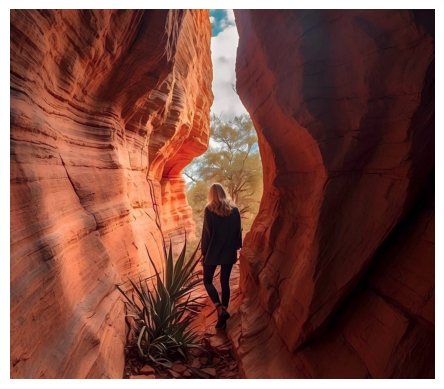

In [107]:
# Decode the Base64 string
image_data = base64.b64decode(base64_image)

# Convert the binary data to an image
image = Image.open(BytesIO(image_data))

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [130]:
text = """The image shows a person standing between two large rock formations, possibly in a canyon. The prominent colors are varying shades of red and orange from the rocks, which reflect warm sunlight. In the distance, there is visible foliage and a blue, partially cloudy sky.\n\nIt is challenging to determine with certainty if this image is AI-generated or a real photograph based only on visual inspection. However, the overall detail and realistic lighting suggest it could be a real photograph. High-quality AI-generated images can sometimes be very convincing, though. If you have observed specific indications or know the source, you might be able to verify the nature of the image with more certainty."""

In [132]:
gpt3_response.choices[0].content.ness

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='तस्वीर में एक व्यक्ति दिख रहा है जो दो बड़ी चट्टानों के बीच खड़ा है, संभावित रूप से एक खाड़ी में। प्रमुख रंग चट्टानों से ऊंची ऊँची गिरावटों के विभिन्न रंगों की हैं, जो गर्म सूर्यकिरण से प्रकाशित हो रहे हैं। दूर से, हरियाली और एक नीला, आंशिक मेघयुक्त आसमान दिखाई दे रहा है।\n\nकेवल दृश्यी मूल्यांकन पर आधारित कर पाना कठिन है कि यह छवि AI जनरेट की गई है या वास्तविक फोटो है। हालांकि, कुल विवरण और वास्तविक प्रकाशन का प्रस्ताव देते हैं कि यह वास्तविक फोटो हो सकती है। उच्च गुणवत्ता वाली AI उत्पन्न छवियाँ कभी-कभी बहुत प्रफुल्लित हो सकती हैं, हालांकि। यदि आपने विशिष्ट संकेतों का अवलोकन किया है या स्रोत जानते हैं, तो आपको इस छवि की प्रकृति की अधिक निश्चितता के साथ सत्यापित करने में सक्षम हो सकता है।', role='assistant', function_call=None, tool_calls=None))

In [108]:

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4o",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in this image? Is it AI generated or real?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}


In [109]:
img_response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

In [133]:
img_response.json()['choices'][0]['message']['content']

'The image shows a person standing between two large rock formations, possibly in a canyon. The prominent colors are varying shades of red and orange from the rocks, which reflect warm sunlight. In the distance, there is visible foliage and a blue, partially cloudy sky.\n\nIt is challenging to determine with certainty if this image is AI-generated or a real photograph based only on visual inspection. However, the overall detail and realistic lighting suggest it could be a real photograph. High-quality AI-generated images can sometimes be very convincing, though. If you have observed specific indications or know the source, you might be able to verify the nature of the image with more certainty.'

In [153]:
client = OpenAI()

gpt3_response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {"role": "system", "content": "You are trying to translate the message to that of a young angry man in Tamil."},
    {"role": "user", "content": img_response.json()['choices'][0]['message']['content']},
  ]
)

In [154]:
gpt3_response.choices[0].message.content

'இந்த படத்தில் ஒரு நபர் இரு பெரிய பாறை அமைப்புகளுக்கிடையில் நின்று கொண்டிருக்கிறார், இது ஒருவிதமாக ஒரு குடைச் சுரங்கத்தை பார்க்கின்றது. பாறைகளின் முக்கியமான நிறங்கள் வெவ்வேறு செம்மண் மற்றும் ஆரஞ்சு தாதுக்கள் ஆகும், இவை வெப்பமான சூரிய ஒளியை பிரதிபலிக்கின்றன. தொலைவில், சில பசுமையான கொடிகள் மற்றும் நீல, பகுதியளவில் மேகம்யான வானம் தென்படுகிறது.\n\nஒன்றரை மட்டுமே பார்வையால் இந்த படம் ஏ.ஐ உருவாக்கியது அல்லது உண்மையான ஒரு புகைப்படமாக உள்ளது என்பதனை உறுதியாக உறுதிசெய்ய பிரச்னை இருக்கின்றது. எனினும், மொத்த பகுதி மற்றும் யதார்த்தமான ஒளியாளப்பாடுகள் இது உண்மையான ஒரு புகைப்படமாக இருக்கக்கூடும் என்பதைக் குறிப்பதாகும். உயர் தரமான ஏ.ஐ உருவாக்கிய புகைப்படங்கள் சில நேரங்களில் மிகவும் நம்பகத்தன்மையாக இருக்கும். நீங்கள் குறிப்பிட்ட குறிப்புகளை கவனித்தால் அல்லது மூலத்தை தெரிந்தால், படத்தின் இயல்பு குறித்து மேலும் உறுதியாக அறிய முடியும்.'

In [155]:
rootsave = 'speechTmlG4o'

In [156]:
speech_file_path = f"{rootsave}.mp3"
response = client.audio.speech.create(
  model="tts-1",
  voice="nova",
    input=gpt3_response.choices[0].message.content
  #input=img_response.json()['choices'][0]['message']['content']


)

response.stream_to_file(speech_file_path)

/var/folders/h0/qsvw48hn5m5bx13015zw15dc0000gn/T/ipykernel_88108/3464134848.py:11: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)


In [157]:
with open(f'{rootsave}.txt', 'w') as f:
    #f.write(img_response.json()['choices'][0]['message']['content'])
    f.write(gpt3_response.choices[0].message.content)

In [19]:
response?

Type:        HttpxBinaryResponseContent
String form: <openai._legacy_response.HttpxBinaryResponseContent object at 0x1106646d0>
File:        ~/opt/miniconda3/envs/RL/lib/python3.11/site-packages/openai/_legacy_response.py
Docstring:   <no docstring>

In [106]:
img_response.json()

{'id': 'chatcmpl-9Q8YQO6K1cgmLM9EdNAn8HcK5jNM2',
 'object': 'chat.completion',
 'created': 1716016438,
 'model': 'gpt-4o-2024-05-13',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'This image depicts a group of individuals, with one older man in the front appearing to take a selfie. The man is bald, wearing round glasses, and has a mustache, somewhat resembling Gandhi. The people in the background are dressed in traditional clothing.\n\nGiven the visual style, slight surrealism in facial features, and overall composition, this image appears to be AI-generated rather than a real photograph.'},
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 445, 'completion_tokens': 80, 'total_tokens': 525},
 'system_fingerprint': 'fp_927397958d'}

In [35]:
response.aclose()

/var/folders/h0/qsvw48hn5m5bx13015zw15dc0000gn/T/ipykernel_88108/1173479641.py:1: RuntimeWarning: coroutine 'HttpxBinaryResponseContent.aclose' was never awaited
  dir(response.aclose())


['__await__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'cr_await',
 'cr_code',
 'cr_frame',
 'cr_origin',
 'cr_running',
 'cr_suspended',
 'send',
 'throw']

In [38]:
response